<a href="https://colab.research.google.com/github/pucuk-yusup/Portofolio-Analisis/blob/main/World_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#package
!pip install fredapi
!pip install pandas matplotlib statsmodels
!pip install wbdata

In [2]:
#library
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Tentukan indikator ekonomi yang ingin diambil
indicators = {
    'NY.GDP.PCAP.KD': 'GDP_per_Capita',
    'FP.CPI.TOTL.ZG': 'Inflation_CPI'
}


In [11]:
# Tentukan periode waktu data
data_dates = (datetime(2000, 1, 1), datetime(2023, 12, 31))

In [13]:
!pip show wbdata

Name: wbdata
Version: 1.0.0
Summary: A library to access World Bank data
Home-page: https://github.com/OliverSherouse/wbdata
Author: Oliver Sherouse
Author-email: oliver@oliversherouse.com
License: GPL-2.0+
Location: /usr/local/lib/python3.11/dist-packages
Requires: appdirs, backoff, cachetools, dateparser, decorator, requests, shelved-cache, tabulate
Required-by: 


In [14]:
!pip install --upgrade wbdata

In [16]:
## perbaikan
# Definisikan indikator
indicators = {
    'NY.GDP.PCAP.KD': 'GDP_per_Capita',
    'FP.CPI.TOTL.ZG': 'Inflation_CPI'
}

In [26]:
# Definisikan periode waktu
data_dates = (datetime(2000, 1, 1), datetime(2024, 12, 31))

In [27]:
# PENTING: Gunakan list untuk country
df = wbdata.get_dataframe(indicators, country=['IDN'], date=data_dates)

In [28]:
# Bersihkan data
df = df.dropna().sort_index()

In [29]:
#tampil data
print(df.head())

      GDP_per_Capita  Inflation_CPI
date                               
2000     1828.102660       3.688619
2001     1868.591723      11.500115
2002     1926.374359      11.900118
2003     1991.918205       6.757317
2004     2065.706175       6.064060


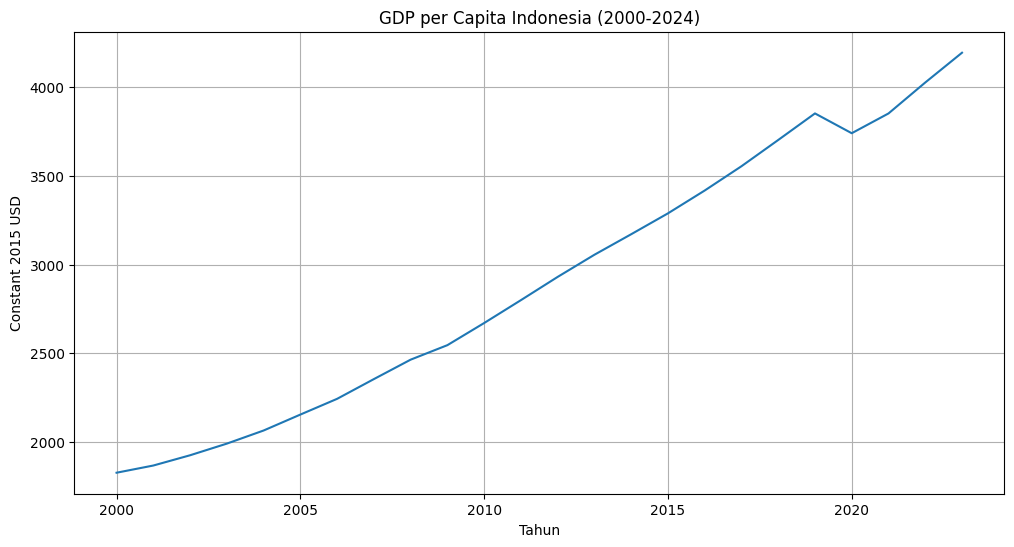

In [30]:
#visualisasi
# Plot Data GDP per kapita
df['GDP_per_Capita'].plot(figsize=(12,6), title='GDP per Capita Indonesia (2000-2024)')
plt.ylabel('Constant 2015 USD')
plt.xlabel('Tahun')
plt.grid()

# Simpan gambar ke file PNG
plt.savefig("gdp_per_capita_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
#unduh visualization
from google.colab import files
files.download("gdp_per_capita_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

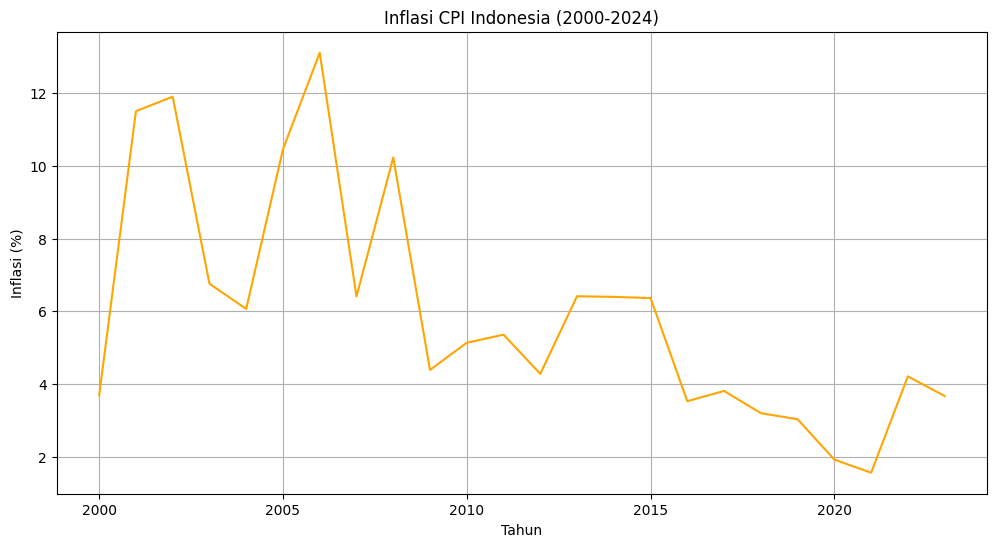

In [31]:
# Plot Inflasi CPI
df['Inflation_CPI'].plot(figsize=(12,6), color='orange', title='Inflasi CPI Indonesia (2000-2024)')
plt.ylabel('Inflasi (%)')
plt.xlabel('Tahun')
plt.grid()
# Simpan gambar ke file PNG
plt.savefig("inflation_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
#unduh visualization
from google.colab import files
files.download("inflation_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
#panggil library buat bikin model
from statsmodels.tsa.arima.model import ARIMA

# Split Data (train hingga 2019, test dari 2020)
train = df.loc[:'2019']['GDP_per_Capita']
test = df.loc['2020':]['GDP_per_Capita']

In [34]:
# Bangun Model ARIMA(1,1,1)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [35]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))

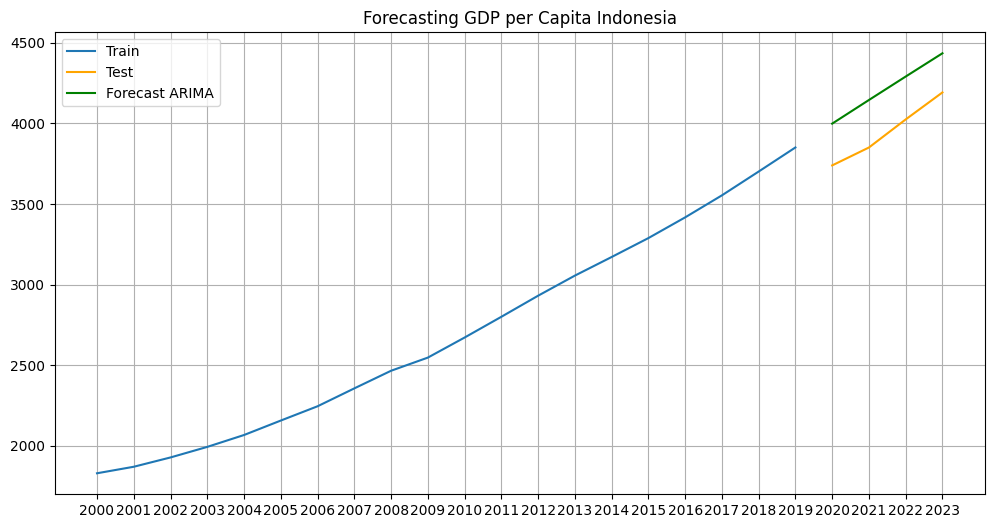

In [36]:
# Plot hasil forecasting
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast ARIMA', color='green')
plt.legend()
plt.title('Forecasting GDP per Capita Indonesia')
plt.grid()

# Simpan gambar ke file PNG
plt.savefig("forecast_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [37]:
#unduh visualization
from google.colab import files
files.download("forecast_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
#cek stasioneritas
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print(f'p-value: {result[1]}')

# Kalau p-value > 0.05, lakukan differencing


p-value: 1.0


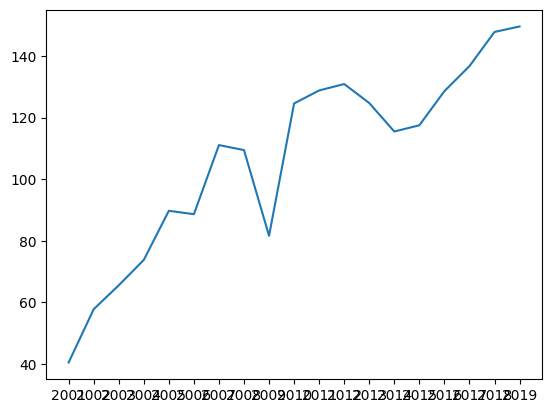

In [39]:
#diferencing
train_diff = train.diff().dropna()
plt.plot(train_diff)

In [40]:
#auto arima (parameter_optimal)

!pip install pmdarima

import pmdarima as pm

auto_model = pm.auto_arima(train, seasonal=False, stepwise=True)
print(auto_model.summary())

# hasilkan forecast
forecast_auto = auto_model.predict(n_periods=len(test))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 -71.806
Date:                Sat, 15 Mar 2025   AIC                            149.612
Time:                        03:20:43   BIC                            152.283
Sample:                    01-01-2000   HQIC                           149.980
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6406      1.891      2.982      0.003       1.934       9.348
ma.L1         -0.5271      0.257     -2.054      0.040      -1.030      -0.024
sigma2       167.9917     77.308      2.173      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [41]:
import pmdarima as pm
import matplotlib.pyplot as plt

auto_model = pm.auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Forecast dengan parameter optimal dari auto_arima
forecast_auto = auto_model.predict(n_periods=len(test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=150.523, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=150.962, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=149.612, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=151.547, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=153.319, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 0.856 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


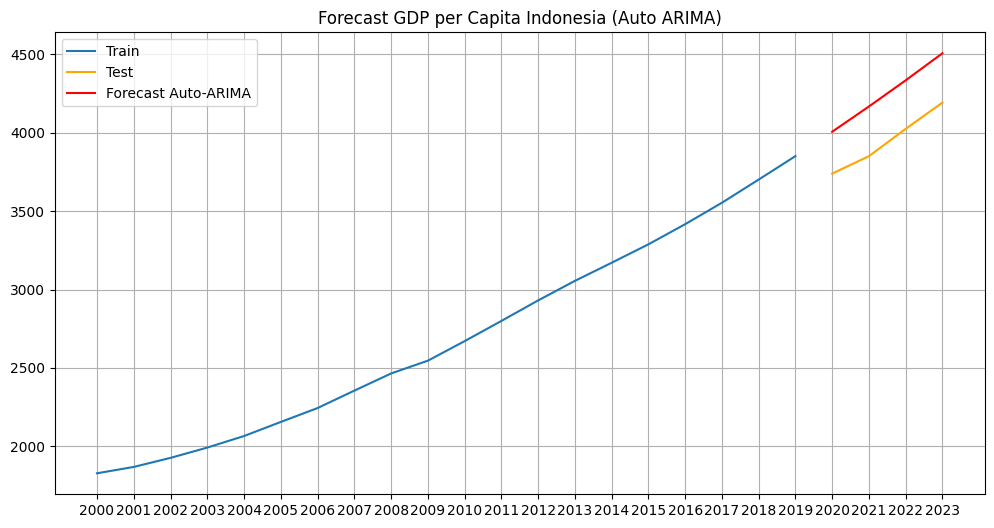

In [42]:
# Visualisasi forecast hasil Auto-ARIMA
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, forecast_auto, label='Forecast Auto-ARIMA', color='red')
plt.legend()
plt.title('Forecast GDP per Capita Indonesia (Auto ARIMA)')
plt.grid()
plt.show()